---
title       : "Identification Robust Inference"
subtitle    :
author      : Paul Schrimpf
date        : `j using Dates; print(Dates.today())`
bibliography: "ee.bib"
---

[![](https://i.creativecommons.org/l/by-sa/4.0/88x31.png)](http://creativecommons.org/licenses/by-sa/4.0/)

This work is licensed under a [Creative Commons Attribution-ShareAlike
4.0 International
License](http://creativecommons.org/licenses/by-sa/4.0/) 

### About this document {-}

This document was created using Weave.jl. The code is available in
[on github](https://github.com/schrimpf/GMMInference.jl). The same
document generates both static webpages and associated [jupyter
notebook](identificationRobustInference.ipynb).

$$
\def\indep{\perp\!\!\!\perp}
\def\Er{\mathrm{E}}
\def\R{\mathbb{R}}
\def\En{{\mathbb{E}_n}}
\def\Pr{\mathrm{P}}
\newcommand{\norm}[1]{\left\Vert {#1} \right\Vert}
\newcommand{\abs}[1]{\left\vert {#1} \right\vert}
\DeclareMathOperator*{\argmax}{arg\,max}
\DeclareMathOperator*{\argmin}{arg\,min}
\def\inprob{\,{\buildrel p \over \rightarrow}\,} 
\def\indist{\,{\buildrel d \over \rightarrow}\,} 
$$

In [1]:
markdown = try
  "md" in keys(WEAVE_ARGS) && WEAVE_ARGS["md"]
catch
  false
end

if !("DISPLAY" ∈ keys(ENV))
  ENV["GKSwstype"]="nul"
  ENV["MPLBACKEND"]="Agg"
end

"Agg"

# Identification robust inference

As discussed in section 9 of Newey and McFadden (1994)[@newey1994], there are three classic types
of statistics for testing restrictions on parameters. Suppose you want
to test $H_0: a(\theta) = 0$. Let $\hat{\theta}$ denote the
unrestricted estimate, and let $\hat{\theta}^r$ denote the
estimate of $\theta$ subject to the restriction. Wald test-statistics
are based on $\hat{\theta}-\hat{\theta}^r$. Lagrange multiplier tests
look at the distribution of the estimated Lagrange
multiplier. Likelihood ratio (aka distance metric in Newey and McFadden (1994)[@newey1994]) tests
look at $Q_n(\hat{\theta}) - Q_n(\hat{\theta}^r)$. If we consider
testing $H_0: \theta = \vartheta$ for some fixed $\vartheta$, then the
usual approach based on the asymptotic normality of $\hat{\theta}$
discussed above is exactly the same as the Wald test of this
restriction. As discussed by Newey and McFadden (1994)[@newey1994], under standard assumptions,
all three testing approaches are asymptotically equivalent. However,
the tests can and will differ in finite samples. More importantly, in
the face of identification problems, Wald tests tend to break down,
while Lagrange multiplier and likelihood ratio style tests can
continue to work. 

By identification robust, we mean an inference procedure that has
correct size regardless of whether identification is strong, weak,
or partial. In the asymptotic normality of extremum estimators theorem
above, non-strong identification will create problems for assumption
3, in particular the assumption that the Hessian is non-singular. For
this section, we will focus on GMM estimators. Identification problems
most often arrive and have been studied in the context of GMM. Also,
it is not difficult to transform other extremum estimators into GMM. 

For a GMM objective function of the form:
$$ [1/n \sum_i g_i(\theta)] W_n [1/n \sum g_i(\theta]$$, 
if we assume:

1. $1/\sqrt{n} \sum_i g_i(\theta_0) \indist N(0,\Sigma)$

2. $1/n \sum_i \nabla g_i(\theta) \inprob E[\nabla g(\theta)]$, 
   $W_n \inprob W$

3. $(D'WD)$ is nonsingular.

then the above theorem for asymptotic normality of extremum
estimators implies that 
$$
\sqrt{n}(\hat{\theta} - \theta_0) \indist N(0,\Omega)
$$
where 
$$
 \Omega= (D'WD)^{-1} (D' W \Sigma W D) (D'WD)^{-1}.
$$
If we additionally assume $W_n \inprob \Sigma^{-1}$, e.g. observations
are independent and $W_n =
\widehat{Var}(g_i(\theta))^{-1}$, then the asymptotic variance
simplifies to $(D' \Sigma D)^{-1}$. 

### Anderson-Rubin test

As already stated, the assumption that $(D'WD)$ is nonsingular is
problematic if we want to allow for identification problems. However,
if we assume only that 

1. $1/\sqrt{n} \sum_i g_i(\theta_0) \indist N(0,\Sigma)$

2. $W_n \inprob \Sigma^{-1}$

then 
$$
n [1/n \sum g_i(\theta_0)]' W_n [1/n \sum g_i(\theta_0)]
  \indist \chi^2_m
$$
where $m$ is the number of moments (dimension of $g_i(\theta)$). This
is called the Anderson-Rubin test. Note that this result holds without
any explicit nonsingular assumption about a Hessian. Hence, there is
hope that this result would be true even with identification
problems. Indeed, it is. Stock and Wright (2000)[@stock2000] first proposed using this test
statistic for weakly identified GMM estimators. Stock, Wright, and Yogo (2002)[@stock2002] gives an
overview of this test and related tests with a focus on linear
IV. Caner (2009)[@caner2009] discusses this test in the context of GMM.

Typical usage of the AR test is to invert the test to construct a
confidence region for $\theta$. For each $\theta \in \Theta$, 
let 
$$
AR(\theta) = n [1/n \sum g_i(\theta)]' \widehat{Var}(g_i(\theta))^{-1}
[1/n \sum g_i(\theta)] 
$$
and let $c_{\alpha}= \alpha$ quantile of $\chi^2_m$. Then a $\alpha$
confidence region for $\theta_0$ is
$$
\{ \theta \in \Theta: AR(\theta) \leq c_\alpha \}
$$

### Example: IV logit demand

A common way to model demand for differentiated products is to
aggregate an individual discrete choice. We will look at the simplest
such model here. This is a model for when we have data on product
market shares, $y_j$, and product attributes, $x_j$, for many
different markets. In concrete applications, markets may be defined
geographically, temporally, by consumer segment, or some combination
thereof. 

Consider a single good, which consumers chooose to
purchase or not. Consumer $i$'s utility from consuming the good is
$$
u_{ij} = x_j \beta + \xi_j + \epsilon_{ij}
$$
where $x_j$ are the observed attributes of the good in market $j$,
$\xi_j$ is a market level demand shock, and $\epsilon_{ij}$ is an
individual taste shock. Person $i$ purchases the good if 
$u_{ij} \geq 0$. Aggregating individual purchases implies that the
market share in market $j$ is 
$$ y_j = F_{-\epsilon}(x_j \beta + \xi_j) $$
where $F_{-\epsilon}$ is the CDF of $-\epsilon$.

We assume that $\epsilon_{ij}$ is independent of $x_j$ and
$\xi_j$. Typically, $x_j$ includes some easily adjusted product
attributes, such as price, so we want to allow $x_j$ to be correlated
with $\xi_j$. Assume that we have some instruments $z_j$ such that
$\Er[\xi_j z_j]=0.$  We can write this moment condition in terms of
observables and $\beta$ as
$$ \Er[ (F^{-1}_{-\epsilon}(y_j) - x_j\beta) z_j ] = 0 $$
This is the moment condition we will use to estimate $\beta$.

First, we will simulate the model, then estimate it. This code looks
at three variants of GMM. 

First, it computes an estimate with $W_n = I$. 

Second, it computes an efficiently weighted estimated with 
$$
W_n = \widehat{Var}(g_i(\hat{\theta}_{(1)}))
$$
where
$\hat{\theta}_{(1)}$ is the first estimate. 

Third, it computes the continuous updating estimator, which uses
$AR(\theta)$ as the objective function ( $W$ is "continuously updated"
to be $\widehat{Var}( g_i(\theta))$ ).

In [2]:
using Optim, ForwardDiff, LinearAlgebra, Distributions
function simulate_ivshare(n,β,γ,ρ)
  z = randn(n, size(γ)[1])
  endo = randn(n, length(β))
  x = z*γ .+ endo
  ξ = rand(Normal(0,sqrt((1.0-ρ^2))),n).+endo[:,1]*ρ 
  y = cdf.(Logistic(), x*β .+ ξ)
  return((y=y,x=x,z=z))  
end
n = 100
k = 2
iv = 3
β0 = ones(k)
π0 = vcat(5*I,ones(iv-k,k)) 
ρ = 0.5  
(y,x,z) = simulate_ivshare(n,β0,π0,ρ)

function gi_ivshare(β,y,x,z)
  ξ = quantile.(Logistic(),y) .- x*β
  ξ.*z
end

function gmmObj(θ,gi,W)
  g = gi(θ)
  m = mean(g,dims=1)
  (size(g)[1]*( m*W*m')[1]) # return scalar, not 1x1 array
end

function gmmVar(θ,gi,W)
  g = gi(θ)
  n = size(g)[1]
  D = ForwardDiff.jacobian(θ->mean(gi(θ),dims=1),θ)
  Σ = cov(gi(θ))
  1/n*inv(D'*W*D)*(D'*W*Σ*W*D)*inv(D'*W*D)
end

function ar(θ,gi)
  gmmObj(θ,gi,inv(cov(gi(θ))))
end

ar (generic function with 1 method)

In [3]:
opt1 = optimize(θ->gmmObj(θ, β->gi_ivshare(β,y,x,z) ,I),
                zeros(k), BFGS(), autodiff =:forward)
@show β1 = opt1.minimizer
display(gmmVar(β1, β->gi_ivshare(β,y,x,z),I))
opteff = optimize(θ->gmmObj(θ,β->gi_ivshare(β,y,x,z),inv(cov(gi_ivshare(β1,y,x,z)))),
                  zeros(k), BFGS(), autodiff =:forward)
@show βeff = opteff.minimizer
display(gmmVar(βeff,β->gi_ivshare(β,y,x,z),inv(cov(gi_ivshare(β1,y,x,z)))))

ar_ivshare = θ->ar(θ,β->gi_ivshare(β,y,x,z))
optcue = optimize(ar_ivshare,
                  β0, BFGS(), autodiff =:forward)
@show βcue = optcue.minimizer
Vcue = gmmVar(βcue,β->gi_ivshare(β,y,x,z),inv(cov(gi_ivshare(βcue,y,x,z))))
display(Vcue)

2×2 Array{Float64,2}:
 0.000301291  2.14367e-5 
 2.14367e-5   0.000234679

β1 = opt1.minimizer = [0.9941185432865973, 0.9947003169674632]
βeff = opteff.minimizer = 

2×2 Array{Float64,2}:
 0.000294118  2.54511e-5 
 2.54511e-5   0.000231958

[0.9960875279858892, 0.9918515068514843]


2×2 Array{Float64,2}:
 0.000293882  2.51063e-5 
 2.51063e-5   0.000232261

βcue = optcue.minimizer = [0.9956922520552606, 0.9913119284898575]


Now we compare confidence regions based on the Wald test, and from
inverting the AR statistic.

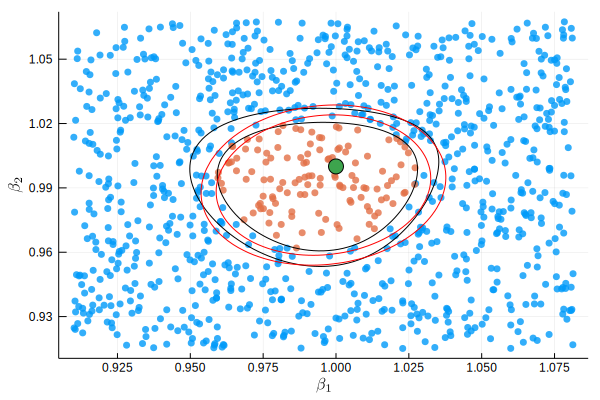

In [4]:
using Plots, LaTeXStrings
Plots.gr()
function plot_cr(β,V, AR)
  lb = β - sqrt.(diag(V))*5
  ub = β + sqrt.(diag(V))*5
  ntest = 1000
  βtest = [rand(length(β)).*(ub-lb) .+ lb for i in 1:ntest]
  arstat = AR.(βtest)
  βtest = vcat(βtest'...)
  crit = quantile(Chisq(size(z)[2]), 0.9)
  scatter(βtest[:,1],βtest[:,2], group=(arstat.<crit), legend=false,
          markersize=4, markerstrokewidth=0.0, seriesalpha=0.8,
          xlabel=L"\beta_1", ylabel=L"\beta_2")
  scatter!([β0[1]], [β0[2]], markersize=8)
  b1 = lb[1]:(ub[1]-lb[1])/100:ub[1]
  b2 = lb[2]:(ub[2]-lb[2])/100:ub[2]
  arf = (a,b) -> cdf(Chisq(size(z)[2]),AR([a,b]))
  contour!(b1,b2,arf, levels = [0.9, 0.95],
           contour_labels=false, legend=false,
           label="AR CI",
           c=cgrad([:black,:black],[0.0,1.0]))
  waldf = (a,b) -> cdf(Chisq(length(βcue)),([a,b]-βcue)'*inv(Vcue)*([a,b]-βcue))
  contour!(b1,b2,waldf, levels = [0.9, 0.95],
           contour_labels=false,
           label="Wald CI", c=cgrad([:red,:red], [0.0,1.0]),
           legend=false)
end
plot_cr(βcue,Vcue, ar_ivshare)

The two confidence regions above are not too different because the
simulated data was strongly identified. Let's see what happens when we
change the simulation to have weaker identification.

2×2 Array{Float64,2}:
  0.246609  -0.225431
 -0.225431   0.210221

βcue = optcue.minimizer = [1.3151137362783156, 0.603392633677257]


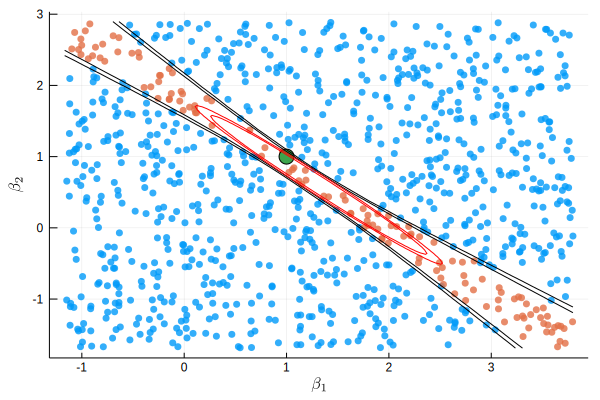

In [5]:
# make π0 nearly rank-deficient
π0 = ones(iv,k) .+ vcat(I*0.05,zeros(iv-k,k))  
ρ = 0.5  
(y,x,z) = simulate_ivshare(n,β0,π0,ρ)
ar_ivshare = θ->ar(θ,β->gi_ivshare(β,y,x,z))
optcue = optimize(ar_ivshare,
                  β0, BFGS(), autodiff =:forward)
@show βcue = optcue.minimizer
Vcue = gmmVar(βcue,β->gi_ivshare(β,y,x,z),inv(cov(gi_ivshare(βcue,y,x,z))))
display(Vcue)
plot_cr(βcue,Vcue, ar_ivshare)

Now the confidence regions are dramatically different. Does either one
have correct coverage? Let's simulate to find the size of the AR and
Wald tests of $H_0 : \beta = \beta_0$

 * Status: failure (reached maximum number of iterations) (line search failed)

 * Candidate solution
    Minimizer: [-5.65e+03, 5.44e+03]
    Minimum:   4.650497e-01

 * Found with
    Algorithm:     Newton's Method (Trust Region)
    Initial Point: [1.00e+00, 1.00e+00]

 * Convergence measures
    |x - x'|               = 1.92e+00 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.40e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 7.11e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.53e-07 ≰ 0.0e+00
    |g(x)|                 = 1.92e-08 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    1001
    ∇f(x) calls:   1001
    ∇²f(x) calls:  1001


 * Status: failure (reached maximum number of iterations) (line search failed)

 * Candidate solution
    Minimizer: [-6.81e+03, 7.27e+03]
    Minimum:   1.885316e+00

 * Found with
    Algorithm:     Newton's Method (Trust Region)
    Initial Point: [1.00e+00, 1.00e+00]

 * Convergence measures
    |x - x'|               = 2.48e+00 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.41e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.16e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.13e-08 ≰ 0.0e+00
    |g(x)|                 = 2.48e-08 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    1001
    ∇f(x) calls:   1001
    ∇²f(x) calls:  1001


 * Status: failure (reached maximum number of iterations) (line search failed)

 * Candidate solution
    Minimizer: [-4.58e+03, 4.85e+03]
    Minimum:   1.349448e+00

 * Found with
    Algorithm:     Newton's Method (Trust Region)
    Initial Point: [1.00e+00, 1.00e+00]

 * Convergence measures
    |x - x'|               = 1.65e+00 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.39e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 5.13e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.80e-08 ≰ 0.0e+00
    |g(x)|                 = 1.65e-08 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    1001
    ∇f(x) calls:   1001
    ∇²f(x) calls:  1001


 * Status: failure (reached maximum number of iterations) (line search failed)

 * Candidate solution
    Minimizer: [-2.84e+03, 2.98e+03]
    Minimum:   9.480090e-01

 * Found with
    Algorithm:     Newton's Method (Trust Region)
    Initial Point: [1.00e+00, 1.00e+00]

 * Convergence measures
    |x - x'|               = 1.00e+00 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.35e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.91e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.02e-08 ≰ 0.0e+00
    |g(x)|                 = 1.00e-08 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    1001
    ∇f(x) calls:   1001
    ∇²f(x) calls:  1001


 * Status: failure (reached maximum number of iterations) (line search failed)

 * Candidate solution
    Minimizer: [-4.18e+03, 4.23e+03]
    Minimum:   1.283017e-01

 * Found with
    Algorithm:     Newton's Method (Trust Region)
    Initial Point: [1.00e+00, 1.00e+00]

 * Convergence measures
    |x - x'|               = 1.43e+00 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.39e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.07e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.17e-07 ≰ 0.0e+00
    |g(x)|                 = 1.43e-08 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    1001
    ∇f(x) calls:   1001
    ∇²f(x) calls:  1001


 16.196974 seconds (40.17 M allocations: 3.398 GiB, 12.53% gc time)
  0.804923 seconds (1.06 M allocations: 745.521 MiB, 18.30% gc time)


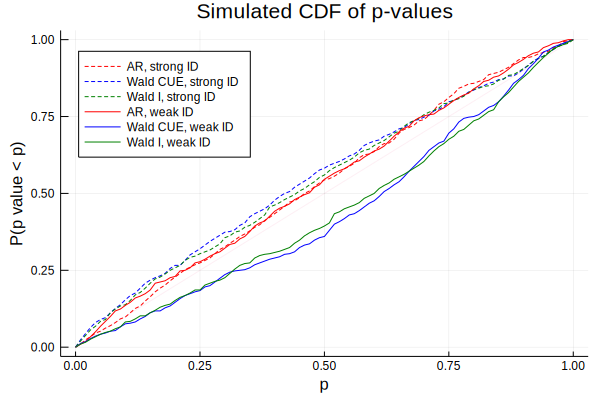

In [6]:
S = 500
n = 100
function sim_p(π0)
  (y,x,z) = simulate_ivshare(n,β0,π0,ρ)
  opt1 = optimize(θ->gmmObj(θ, β->gi_ivshare(β,y,x,z) ,I),
                  β0, BFGS(), autodiff =:forward)
  if (!opt1.g_converged)
    opt1 = optimize(θ->gmmObj(θ, β->gi_ivshare(β,y,x,z) ,I),
                    β0, NewtonTrustRegion(), autodiff =:forward)
  end
  β1 = opt1.minimizer

  V1 = gmmVar(β1,β->gi_ivshare(β,y,x,z),I)
  
  optcue = optimize(θ->ar(θ,β->gi_ivshare(β,y,x,z)),
                    β0, BFGS(), autodiff =:forward)
  if (!optcue.g_converged)
    optcue = optimize(θ->ar(θ,β->gi_ivshare(β,y,x,z)),
                      β0, NewtonTrustRegion(), autodiff =:forward)
  end
  if (!optcue.g_converged)
    display(optcue)
    βcue = deepcopy(β1)
  else 
    βcue = optcue.minimizer
  end
  Vcue =
    gmmVar(βcue,β->gi_ivshare(β,y,x,z),inv(cov(gi_ivshare(βcue,y,x,z))))
  arp = θ->(1.0-cdf(Chisq(size(z)[2]),ar(θ,β->gi_ivshare(β,y,x,z))))
  waldp = θ->(1.0-cdf(Chisq(length(βcue)),(θ-βcue)'*inv(Vcue)*(θ-βcue)))
  waldp1 = θ->(1.0-cdf(Chisq(length(β1)),(θ-β1)'*inv(V1)*(θ-β1)))
  [arp(β0) waldp(β0) waldp1(β0)]
end
πweak = ones(iv,k) .+ vcat(diagm(0=>fill(0.01,k)),zeros(iv-k,k))  
πstrong = vcat(5*diagm(0=>ones(k)),ones(iv-k,k)) 
@time pweak=vcat([sim_p(πweak) for s in 1:S]...)
@time pstrong=vcat([sim_p(πstrong) for s in 1:S]...)

pgrid = 0:0.01:1
plot(pgrid, p->mean( pstrong[:,1] .<= p), legend=:topleft,
     label="AR, strong ID", style=:dash, color=:red,
     xlabel="p", ylabel="P(p value < p)",
     title="Simulated CDF of p-values") 
plot!(pgrid, p->mean( pstrong[:,2] .<= p),
      label="Wald CUE, strong ID", style=:dash, color=:blue)
plot!(pgrid, p->mean( pstrong[:,3] .<= p),
      label="Wald I, strong ID", style=:dash, color=:green)

plot!(pgrid, p->mean( pweak[:,1] .<= p),
      label="AR, weak ID", style=:solid, color=:red)
plot!(pgrid, p->mean( pweak[:,2] .<= p),
      label="Wald CUE, weak ID", style=:solid, color=:blue)
plot!(pgrid, p->mean( pweak[:,3] .<= p),
      label="Wald I, weak ID", style=:solid, color=:green)

plot!(pgrid,pgrid,alpha=0.1, label="")

We see that the Wald test has fairly large size distortions, even when
identification is strong. The AR test has approximately correct size
for both the weakly and strongly identified DGP. 

### Other identification robust tests

There are also identification robust versions of likelihood ratio and
lagrange multiplier test. Moreire (2003)[@moreira2003] proposed a conditional
likelihood ratio (CLR) test for weakly identified linear IV
models. Kleibergen (2005)[@kleibergen2005] developed a Lagrange multiplier (often called
the KLM) test and extended Moreira's CLR test to weakly identified GMM
models.  More recently, Andrews and Guggenberge (2015) [@andrews2015]
and Andrews and Guggenberge (2017) [@andrews2017] showed the
validity of these tests under more general conditions. These tests are
somewhat more complicated than the AR test, but they have the
advantage that they are often more powerful. The AR test statistic has
a $\chi^2_{m}$ distribution, where $m$ is the number of moments. The
CLR and KLM statistics under strong identification have $\chi^2_k$
distributions (as does the Wald statistic), where $k$ is the number of
parameters. Consequently, when the model is overidentified, the CLR
and LM tests are more powerful than the AR test. 


Here is an implementation of the KLM and CLR statistics. The names of
variables roughly follows the notation of Andrews and
Guggenberge(2017) [@andrews2017].

In [7]:
using ForwardDiff, Plots, Optim
Plots.gr()
function statparts(θ,gi)
  # compute common components of klm, rk, & clr stats
  # follows notation of Andrews & Guggenberger 2017, section 3.1
  function P(A::AbstractMatrix) # projection matrix
    A*pinv(A'*A)*A'
  end
  giθ = gi(θ)
  p = length(θ)    
  (n, k) = size(giθ)
  Ω = cov(giθ)  
  gn=mean(gi(θ), dims=1)'
  #G = ForwardDiff.jacobian(θ->mean(gi(θ),dims=1),θ)
  Gi= ForwardDiff.jacobian(gi,θ)
  Gi = reshape(Gi, n , k, p)
  G = mean(Gi, dims=1)
  Γ = zeros(eltype(G),p,k,k)
  D = zeros(eltype(G),k, p)
  for j in 1:p
    for i in 1:n
      Γ[j,:,:] += (Gi[i,:,j] .- G[1,:,j]) * giθ[i,:]'
    end
    Γ[j,:,:] ./= n
    D[:,j] = G[1,:,j] - Γ[j,:,:]*inv(Ω)*gn
  end
  return(n,k,p,gn, Ω, D, P)
end

function klm(θ,gi)
  (n,k,p,gn, Ω, D, P) = statparts(θ,gi)
  lm = n*(gn'*Ω^(-1/2)*P(Ω^(-1/2)*D)*Ω^(-1/2)*gn)[1]
end

function clr(θ,gi)
  (n,k,p,gn, Ω, D, P) = statparts(θ,gi)
  
  rk = eigmin(n*D'*inv(Ω)*D)
  AR  = (n*gn'*inv(Ω)*gn)[1]
  lm = (n*(gn'*Ω^(-1/2)*P(Ω^(-1/2)*D)*Ω^(-1/2)*gn))[1]  
  lr = 1/2*(AR - rk + sqrt( (AR-rk)^2 + 4*lm*rk))
  
  # simulate to find p-value
  S = 5000
  function randc(k,p,r,S)
    χp = rand(Chisq(p),S)
    χkp = rand(Chisq(k-p),S)
    0.5.*(χp .+ χkp .- r .+
          sqrt.((χp .+ χkp .- r).^2 .+ 4 .* χp.*r))
  end
  csim = randc(k,p,rk,S)
  pval = mean(csim.<=lr)
end

clr (generic function with 1 method)

In [8]:
function plot_cr(β,V, tests::AbstractArray{Function}, labels; ngrid=30)
  lb = β - sqrt.(diag(V))*5
  ub = β + sqrt.(diag(V))*5
  fig=scatter([β0[1]], [β0[2]], markersize=8, legend=false,
              xlabel=L"\beta_1", ylabel=L"\beta_2")
  ntest = 1000
  βtest = [rand(2).*(ub-lb) .+ lb for i in 1:ntest]
  pval = tests[1].(βtest)
  βtest = vcat(βtest'...)
  crit = 0.9
  fig=scatter!(βtest[:,1],βtest[:,2], group=(pval.<crit), legend=false,
               markersize=4, markerstrokewidth=0.0, seriesalpha=0.5,
               palette=:heat)
  b1 = lb[1]:(ub[1]-lb[1])/ngrid:ub[1]
  b2 = lb[2]:(ub[2]-lb[2])/ngrid:ub[2]
  colors = [:black, :red, :blue, :green]
  for t in 1:length(tests)
    fig=contour!(b1,b2,(a,b)->tests[t]([a,b]),
             levels = [0.9, 0.95],
             contour_labels=false, legend=false,
             label = labels[t],
             c=cgrad([colors[t],colors[t]],[0.0,1.0]))
  end
  fig
end

plot_cr (generic function with 2 methods)

Here's what the confidence regions look like when identification is
fairly weak. The green lines are the Wald confidence region, blue is
AR, red is KLM, and black is CLR.

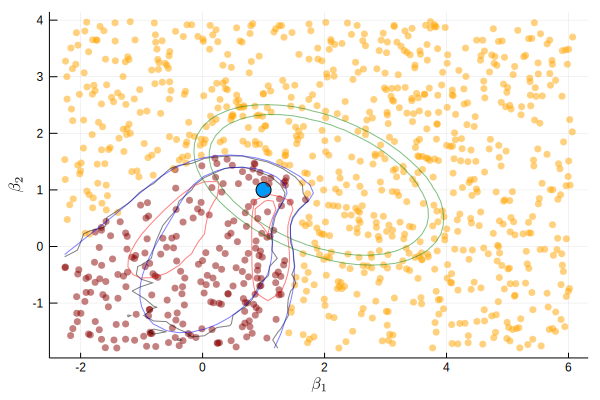

In [9]:
n = 50
k = 2
iv =3 
π0 = vcat(0.1*diagm(0=>ones(k)),0.2*ones(iv-k,k)) 
ρ = 0.5  
(y,x,z) = simulate_ivshare(n,β0,π0,ρ)
opt1 = optimize(θ->gmmObj(θ, β->gi_ivshare(β,y,x,z) ,I),
                β0, BFGS(), autodiff =:forward)
β1 = opt1.minimizer
V1 = gmmVar(β1,β->gi_ivshare(β,y,x,z),I)
  

pklm = θ->cdf(Chisq(length(βcue)),klm(θ, β->gi_ivshare(β,y,x,z)))
par  = θ->cdf(Chisq(size(z)[2]), ar(θ, β->gi_ivshare(β,y,x,z)))
pclr  = θ->clr(θ, β->gi_ivshare(β,y,x,z))
pwald = θ -> cdf(Chisq(length(β1)),(θ-β1)'*inv(V1)*(θ-β1))
plot_cr(β1,V1, [pclr, pklm, par, pwald],
        ["CLR","KLM","AR","Wald"], ngrid=40)

Here's what the confidence regions look like when identification is
stronger.

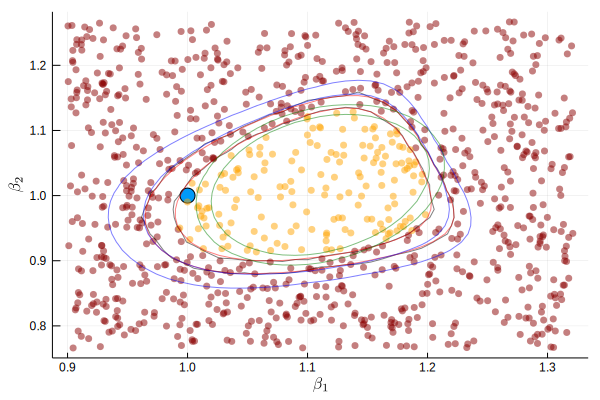

In [10]:
n = 50
k = 2
iv =3 
π0 = vcat(3*diagm(0=>ones(k)),ones(iv-k,k)) 
ρ = 0.5  
(y,x,z) = simulate_ivshare(n,β0,π0,ρ)
opt1 = optimize(θ->gmmObj(θ, β->gi_ivshare(β,y,x,z) ,I),
                β0, BFGS(), autodiff =:forward)
β1 = opt1.minimizer
V1 = gmmVar(β1,β->gi_ivshare(β,y,x,z),I)
  

pklm = θ->cdf(Chisq(length(βcue)),klm(θ, β->gi_ivshare(β,y,x,z)))
par  = θ->cdf(Chisq(size(z)[2]), ar(θ, β->gi_ivshare(β,y,x,z)))
pclr  = θ->clr(θ, β->gi_ivshare(β,y,x,z))
pwald = θ -> cdf(Chisq(length(β1)),(θ-β1)'*inv(V1)*(θ-β1))
plot_cr(β1,V1, [pclr, pklm, par, pwald],
        ["CLR","KLM","AR","Wald"], ngrid=40)

Check the size

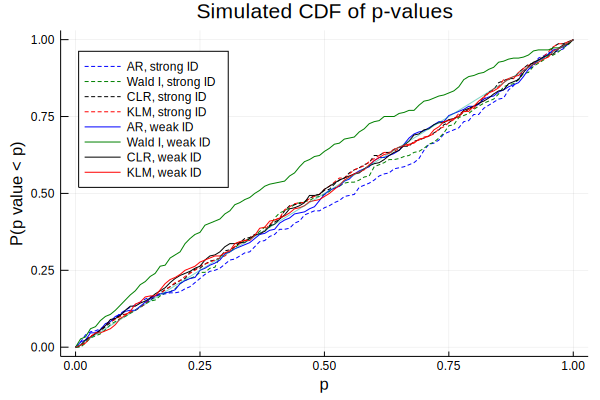

In [11]:
S = 300
n = 100
function sim_p(π0)
  (y,x,z) = simulate_ivshare(n,β0,π0,ρ)
  opt1 = optimize(θ->gmmObj(θ, β->gi_ivshare(β,y,x,z) ,I),
                  β0, BFGS(), autodiff =:forward)
  if (!opt1.g_converged)
    opt1 = optimize(θ->gmmObj(θ, β->gi_ivshare(β,y,x,z) ,I),
                    β0, NewtonTrustRegion(), autodiff =:forward)
  end
  β1 = opt1.minimizer
  V1 = gmmVar(β1,β->gi_ivshare(β,y,x,z),I)
  
  pklm = θ->cdf(Chisq(length(β1)),klm(θ, β->gi_ivshare(β,y,x,z)))
  par  = θ->cdf(Chisq(size(z)[2]), ar(θ, β->gi_ivshare(β,y,x,z)))
  pclr  = θ->clr(θ, β->gi_ivshare(β,y,x,z))
  pwald = θ -> cdf(Chisq(length(β1)),(θ-β1)'*inv(V1)*(θ-β1))  
  [par(β0) pwald(β0) pclr(β0) pklm(β0)]
end
πweak = ones(iv,k) .+ vcat(diagm(0=>fill(0.01,k)),zeros(iv-k,k))  
πstrong = vcat(3*diagm(0=>ones(k)),ones(iv-k,k)) 
pweak=vcat([sim_p(πweak ) for s in 1:S]...)
pstrong=vcat([sim_p(πstrong) for s in 1:S]...)

pgrid = 0:0.01:1
plot(pgrid, p->mean( pstrong[:,1] .<= p), legend=:topleft,
     label="AR, strong ID", style=:dash, color=:blue,
     xlabel="p", ylabel="P(p value < p)",
     title="Simulated CDF of p-values") 
plot!(pgrid, p->mean( pstrong[:,2] .<= p),
      label="Wald I, strong ID", style=:dash, color=:green)
plot!(pgrid, p->mean( pstrong[:,3] .<= p),
      label="CLR, strong ID", style=:dash, color=:black)
plot!(pgrid, p->mean( pstrong[:,4] .<= p),
      label="KLM, strong ID", style=:dash, color=:red)

plot!(pgrid, p->mean( pweak[:,1] .<= p),
      label="AR, weak ID", style=:solid, color=:blue)
plot!(pgrid, p->mean( pweak[:,2] .<= p),
      label="Wald I, weak ID", style=:solid, color=:green)
plot!(pgrid, p->mean( pweak[:,3] .<= p),
      label="CLR, weak ID", style=:solid, color=:black)
plot!(pgrid, p->mean( pweak[:,4] .<= p),
      label="KLM, weak ID", style=:solid, color=:red)
plot!(pgrid,pgrid,alpha=0.5, label="")

<!-- ## Bootstrap -->

<!-- The bootstrap and related simulation methods can also be used for -->
<!-- inference. We will look at these in more detail in the next set of notes. -->

<!-- ## Bayesian methods -->

<!-- Bayesian methods give an alternative approach to both estimation and -->
<!-- inference. In some situations, Bayesian methods can be more convenient -->
<!-- and/or more numerically robust. In well behaved settings, when viewed -->
<!-- from a frequentist perspective, Bayesian methods asymptotically give -->
<!-- the same results as MLE (or efficiently weighted GMM in the case of -->
<!-- quasi-Bayesian models).  -->
    
# References

\bibliography